In [1]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws;u_dim=1;add_reg=no'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/mnt/nfs6/fultonw/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/hyperparameter_loss_surface_stratified/CA_housing/cache/ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws;u_dim=1;add_reg=no'


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

In [4]:
# define data
training_proportion = 0.9
training_sampler = functools.partial(data.kmm_paper_pca_subsample, 10., 5., 0.1)
get_data_f = data.CA_housing
num_data = 900

In [5]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

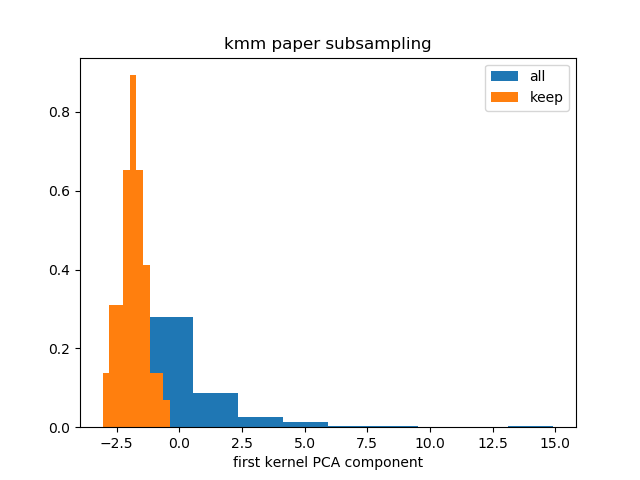

xs_train shape: (108, 9) xs_test_shape (108,)


In [6]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [7]:
# define fitter
import pymanopt.solvers
pymanopt_options={'logverbosity':2, 'maxiter':1000}#, 'linesearch':pymanopt.solvers.linesearch.LineSearchBackTracking(maxiter=2, initial_stepsize=1)}
cvx_opt_warm_start = True
cvx_opt_scipy_minimize_options = {'maxiter':1000, 'disp':False}
#cvx_opt_scipy_minimize_method = 'cg'
#cvx_opt_scipy_minimize_method = 'BFGS' 
cvx_opt_scipy_minimize_method = 'L-BFGS-B'
#cvx_opt_scipy_minimize_verbose = 1000
cvx_opt_scipy_minimize_verbose = False
unconstrained = False
unconstrained_scipy_minimize_options = {'maxiter':100}
unconstrained_scipy_minimize_method = 'cg'
unconstrained_scipy_minimize_verbose = 1
plot_b_info = constructors.plot_b_info
#unconstrained = True
num_tries = 5
add_reg=False
def get_fitter(c_lsqr, c_logreg, weight_reg, sigma, max_ratio, u_dim, c_lsqr_loss=0., c_lsqr_loss_eval=0., UB_reg=0.):
    if unconstrained:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=xs_train.shape[1]))
    else:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
    return constructors.no_ws_logreg_ratio_UB_fitter(c_lsqr=c_lsqr, c_logreg=c_logreg, weight_reg=weight_reg, sigma=sigma, B_init_f_getter=B_init_f_getter, unconstrained=unconstrained, add_reg=add_reg, c_lsqr_loss=c_lsqr_loss, c_lsqr_loss_eval=c_lsqr_loss_eval, UB_reg=UB_reg, max_ratio=max_ratio, num_tries=num_tries, pymanopt_options=pymanopt_options, cvx_opt_warm_start=cvx_opt_warm_start, cvx_opt_scipy_minimize_method=cvx_opt_scipy_minimize_method, cvx_opt_scipy_minimize_verbose=cvx_opt_scipy_minimize_verbose, cvx_opt_scipy_minimize_options=cvx_opt_scipy_minimize_options, unconstrained_scipy_minimize_method=unconstrained_scipy_minimize_method, unconstrained_scipy_minimize_verbose=unconstrained_scipy_minimize_verbose, unconstrained_scipy_minimize_options=unconstrained_scipy_minimize_options, plot_b_info=plot_b_info)

In [8]:
# define hyperparameter search space via an iterator
#UB_regs = [0.]#1,1.,10.]
u_dims = [1,]
#c_lsqr_losses = [0.]
#c_lsqr_loss_evals = [0.]
c_lsqrs = [.01,.1,1.,10.]
c_logregs = [0.1,1.,10.]
weight_regs = [0.1,.5,1.,5.]
sigmas = [0.25,1.,5.]#,5.]
max_ratios = [5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('u_dim',u_dims), 
    )
nocare_hyperparam_tuples = itertools.product(
#    make_tuple('c_lsqr_loss',c_lsqr_losses), 
#    make_tuple('c_lsqr_loss_eval',c_lsqr_loss_evals), 
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('weight_reg',weight_regs), 
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [9]:
# define mapper
mapper = map

In [ ]:
#
num_iterations = 1

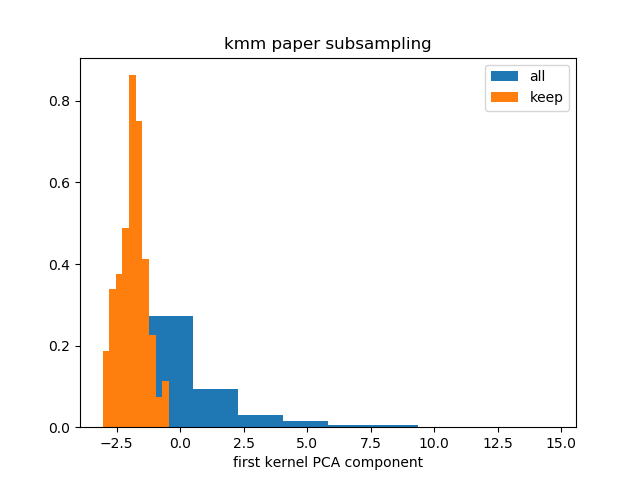

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.6977852716650259e+00	9.67204634e-01
    1	+9.2206920967484729e-01	1.88507917e+00
    2	+8.4058837121607599e-01	1.82421129e+00
    3	+6.8441957217399185e-01	8.10298254e-01
    4	+6.3148600374571751e-01	3.01547710e-01
    5	+6.1957247533716719e-01	2.11587958e-01
    6	+6.1783266024462313e-01	1.51612598e-01
    7	+6.1533123326311556e-01	9.26426103e-02
    8	+6.1388744310960730e-01	1.25596597e-01
    9	+6.1243630269023319e-01	1.04981191e-01
   10	+6.1138673674683419e-01	5.91798624e-02
   11	+6.1109897790703216e-01	3.26063959e-02
   12	+6.1099475098203015e-01	3.55920838e-02
   13	+6.1084539688230088e-01	2.01654449e-02
   14	+6.1076275116717860e-01	2.45121045e-02
   15	+6.1040700446613205e-01	6.38263181e-02
   16	+6.1021732411116902e-01	3.13222161e-02
   17	+6.1016790181967906e-01	2.53504372e-02
   18	+6.1014327798359713e-01	2.27729268e-02
   19	+6.1008172990794407e-01	2.03972464e-02
   20	+6.099859

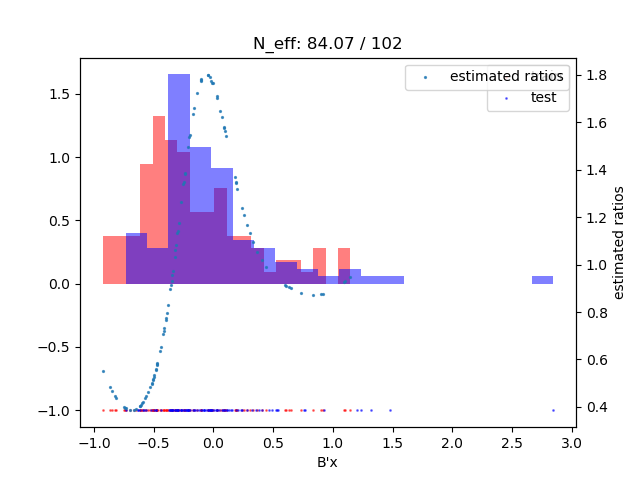

('fig_text #3',)
('train_loss: 0.58',)
('test_loss: 0.87',)


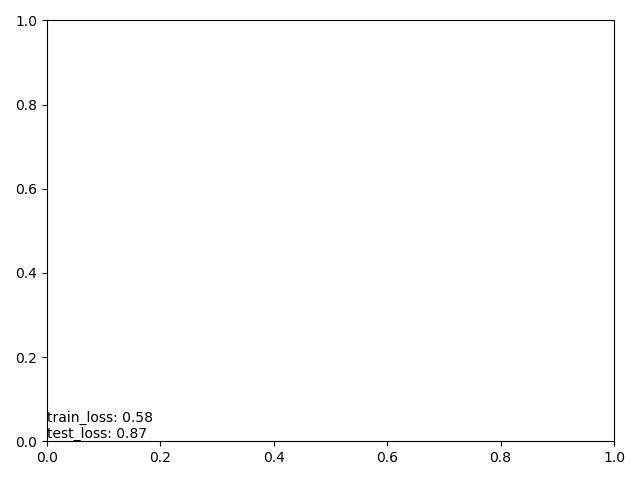

b_norm: 1.0


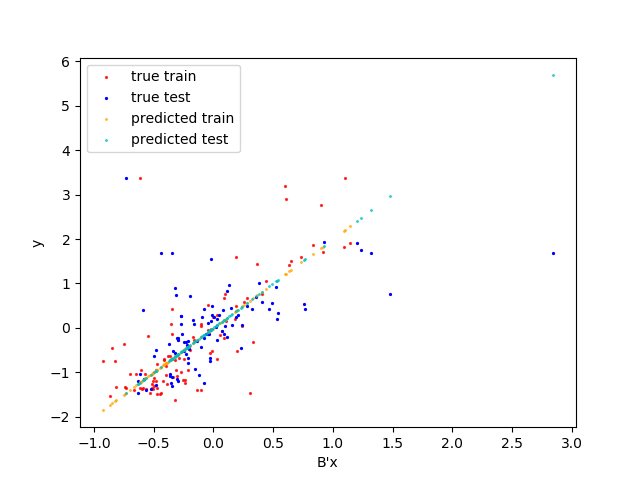

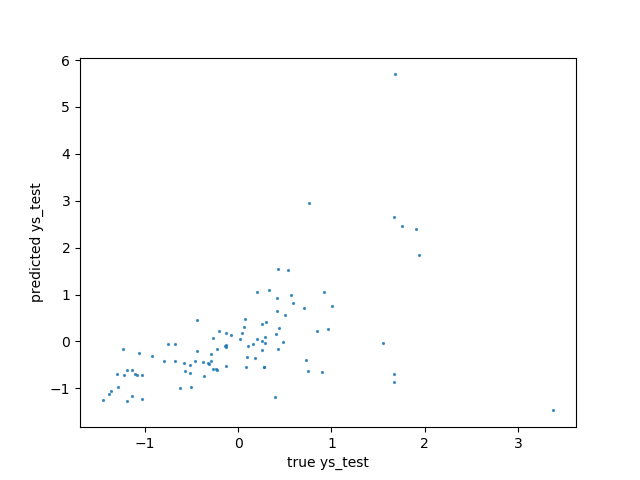

('fig_text #6',)
('single iteration',)
('inner iteration: 0',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.87',)
('train_loss: 0.58',)


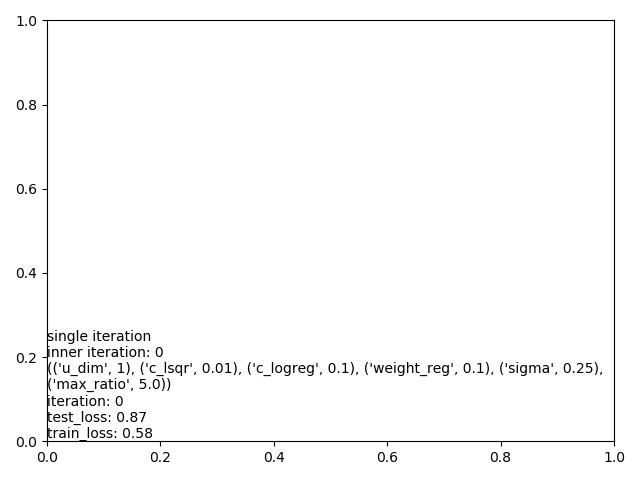

('fig_text #7',)
('single hyperparam',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 0.87',)
('test std loss: 0.00',)
('test losses: [0.86878574170185474]',)
('train mean loss: 0.58',)
('train std loss: 0.00',)
('train losses: [0.57734753689101082]',)


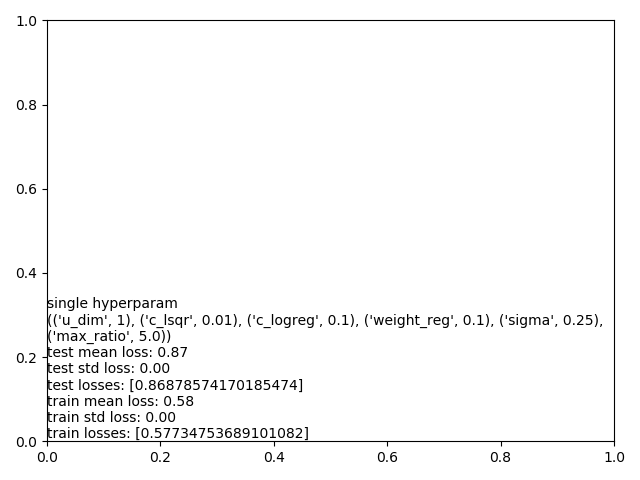

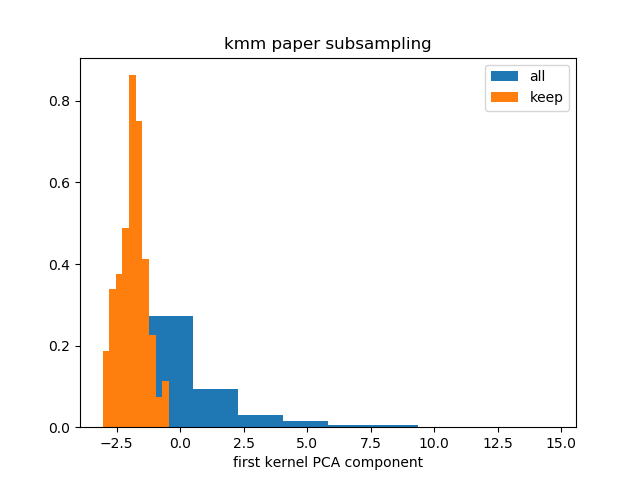

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.7109060100483637e+00	9.30142022e-01
    1	+1.0237822317495533e+00	2.19762355e+00
    2	+9.5273432672308678e-01	2.37525871e+00
    3	+7.2707774855160057e-01	5.31031455e-01
    4	+6.9443953100587996e-01	4.38355112e-01
    5	+6.6428079750018743e-01	3.93124912e-01
    6	+6.5621115432359856e-01	1.66743757e-01
    7	+6.5493434280883245e-01	8.66371195e-02
    8	+6.5447193036234497e-01	7.50349734e-02
    9	+6.5379924127673539e-01	5.73212154e-02
   10	+6.5311812039329054e-01	3.52274455e-02
   11	+6.5264080399013680e-01	2.52552624e-02
   12	+6.5253279348224180e-01	3.81416539e-02
   13	+6.5169176160062037e-01	3.67085209e-02
   14	+6.5132942581709108e-01	5.94091133e-02
   15	+6.4865993056297289e-01	6.57813349e-02
   16	+6.4529201821596527e-01	9.49379852e-02
   17	+6.4492811816126960e-01	5.83351888e-02
   18	+6.4464601354676854e-01	3.57307124e-02
   19	+6.4435019052442932e-01	2.33079110e-02
   20	+6.440903

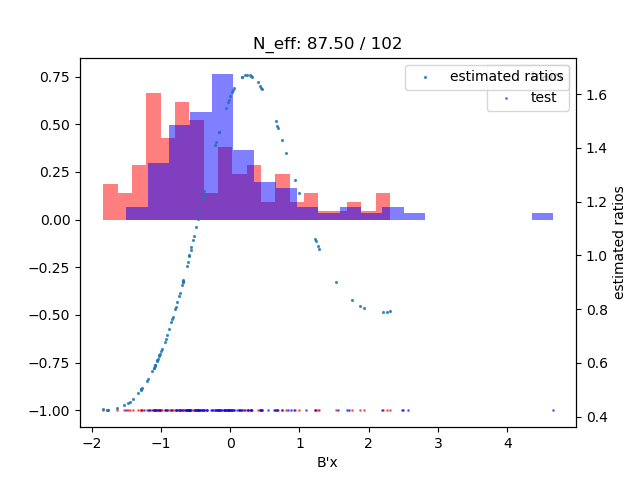

('fig_text #10',)
('train_loss: 0.61',)
('test_loss: 0.72',)


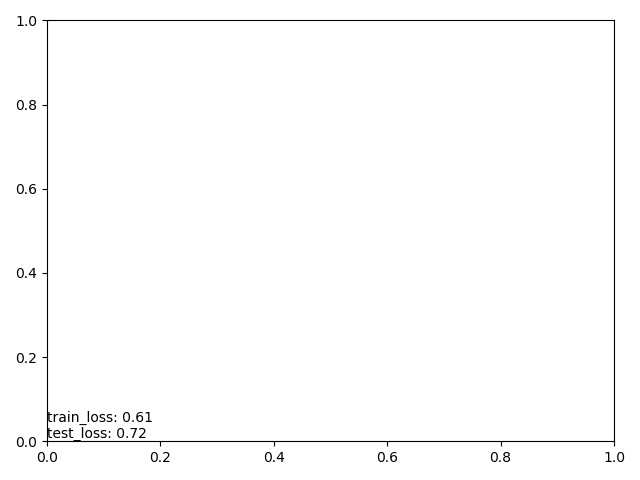

b_norm: 1.0


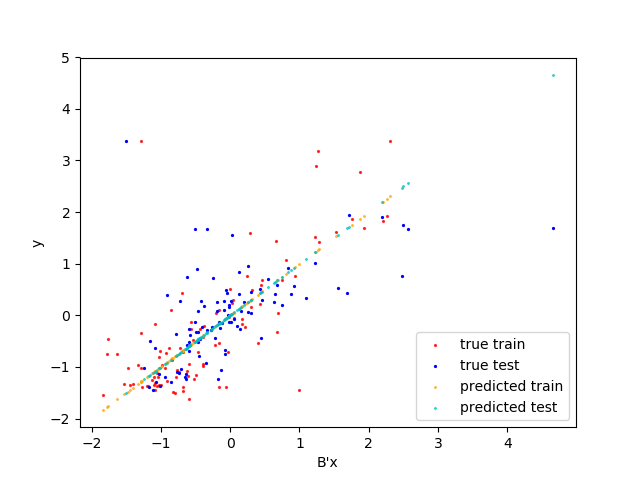

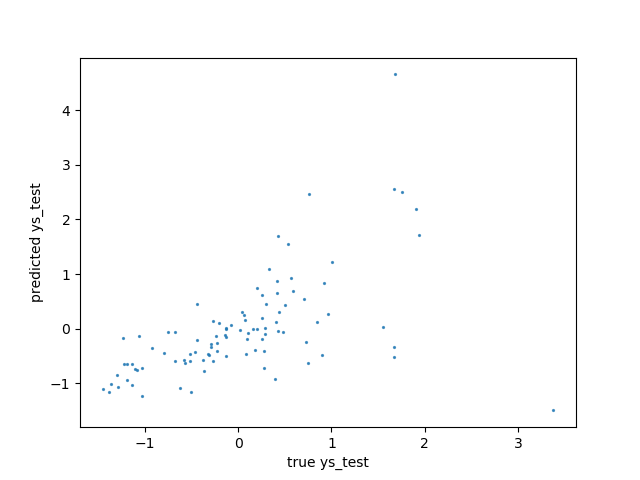

('fig_text #13',)
('single iteration',)
('inner iteration: 1',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 1.0), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.72',)
('train_loss: 0.61',)


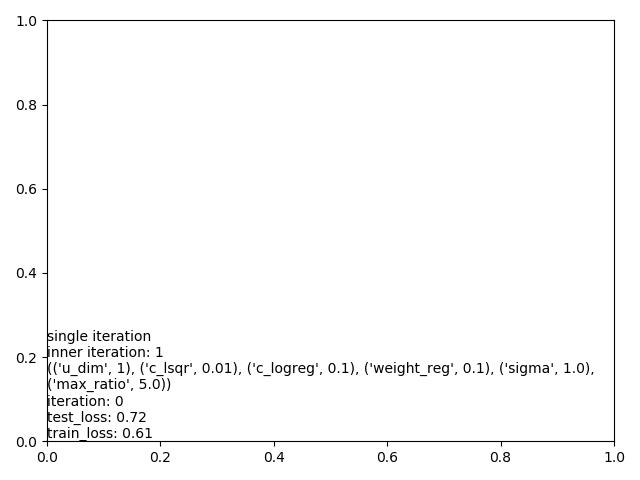

('fig_text #14',)
('single hyperparam',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 1.0), ('max_ratio', 5.0)),)
('test mean loss: 0.72',)
('test std loss: 0.00',)
('test losses: [0.72165693661388164]',)
('train mean loss: 0.61',)
('train std loss: 0.00',)
('train losses: [0.60596576883887332]',)


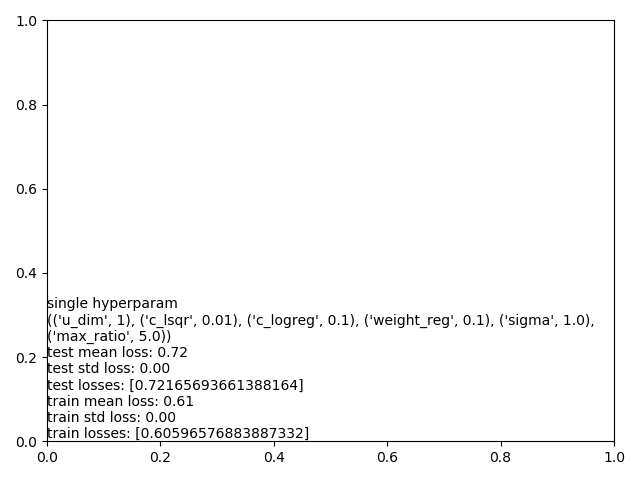

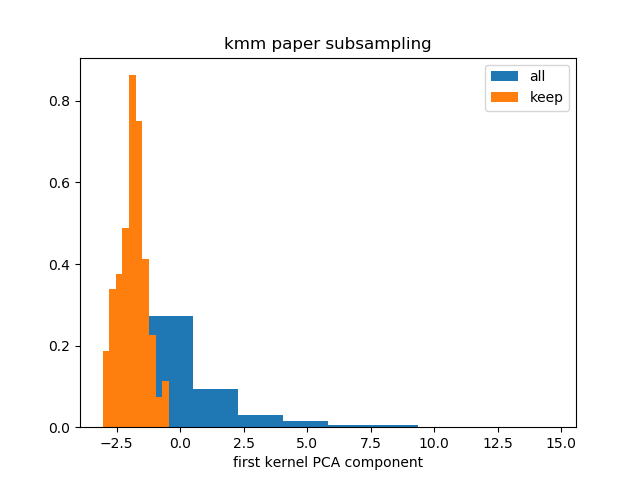

{'logverbosity': 2, 'maxiter': 1000}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.4910637739485832e+00	4.71798521e-01
    1	+9.0832700939217292e-01	1.00647681e+00
    2	+8.6743641821604456e-01	1.10945321e+00
    3	+7.4110215309236183e-01	4.94124592e-01
    4	+7.1745227677754064e-01	3.37747096e-01
    5	+7.0322606480167538e-01	2.81438104e-01
    6	+6.8527516226544294e-01	2.03955713e-01
    7	+6.6884684880035217e-01	1.23005648e-01
    8	+6.6293022651555145e-01	1.82815116e-01
    9	+6.4668486215712595e-01	2.20462024e-01
   10	+6.3895080989692976e-01	3.22689640e-01
   11	+6.2745798169110056e-01	2.93506757e-01
   12	+6.2016383535386288e-01	2.77933752e-01
   13	+6.1317499190120439e-01	1.52673929e-01
   14	+6.1194846752446508e-01	8.44737149e-02
   15	+6.1110003062371954e-01	8.03692990e-02
   16	+6.0936357990557677e-01	1.24049308e-01
   17	+6.0756425689865345e-01	1.02665126e-01
   18	+6.0566468532636442e-01	1.73279026e-01
   19	+6.0403838637538254e-01	1.28752855e-01
   20	+6.022225

KeyboardInterrupt: 

In [ ]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)